# Intro

Principal Component Analysis is a statistical process that distills measurement variation into vectors with greater ability to predict outcomes utilizing a process of scaling, covariance, and eigendecomposition.

An outline of the following page:

* Supporting Material
 - Pluralsight
 - Explained Visually
 - Wikipedia
* Load Data: Format Data & Sort
* Prep Data: Create Returns
* Generate Principal Components
 - Eigen Decomposition and Scree Plot
 - Create Principal Components
* Analysis
 - FVX using PCA
 - FVX using Logisitic Regression
* Alternative Libraries: Psych for the Social Sciences

# Supporting Material

The following two (2) subsections provide links to bette runderstand the process.

## Plurasight

The work is part of a training course from Pluralsight, Understanding and Applying Factor Analysis and PCA:


* https://www.pluralsight.com/courses/understanding-applying-factor-analysis-pca

## Explained Visually

The site Explained Visally has some great visually-oriented descriptions, below:


* Principal Component Analysis: http://setosa.io/ev/principal-component-analysis/

* Eigenvectors and Eigenvalues: http://setosa.io/ev/eigenvectors-and-eigenvalues/

## Wikipedia

* Principal Component Analysis : https://en.wikipedia.org/wiki/Principal_component_analysis

* Eigen Vectors: https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

* Eigendecomposition: https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

# Load Data: Format Data & Sort

To prep the data, it is loaded, the date formatted, and sorted.

In [1]:
# load data
filePath <- "Portfolios.csv"
portfolios.dirty <- read.table(filePath, header = TRUE, sep = ",", stringsAsFactors = FALSE)

# convert date
# http://www.statmethods.net/input/dates.html
portfolios.dirty[, c("AsOfDate")] <- as.Date(portfolios.dirty[, c("AsOfDate")], "%m/%d/%Y")

# sort: 
# http://www.statmethods.net/management/sorting.html
portfolios.sorted <- portfolios.dirty[order(portfolios.dirty$AsOfDate, decreasing = FALSE),]
head(portfolios.sorted)

,AsOfDate,AAPL,ADBE,CVX,GOOG,IBM,MDLZ,MSFT,NFLX,ORCL,SBUX,FVX,SP500
121,2007-01-03,11.10714,38.87,50.77735,251.0010,79.24250,17.51952,24.11848,3.258571,15.69632,15.75219,4.819,1438.24
120,2007-02-01,10.96203,39.25,48.08294,224.9500,74.50320,16.01943,22.09246,3.218571,15.02859,13.93081,4.503,1406.82
119,2007-03-01,12.03738,41.70,51.90038,229.3093,75.56135,16.00935,21.85719,3.312857,16.58358,14.13820,4.537,1420.86
118,2007-04-02,12.93004,41.56,54.58803,235.9259,81.93428,16.92461,23.48060,3.167143,17.19644,13.98491,4.516,1482.37
117,2007-05-01,15.70132,44.06,57.59827,249.2042,85.78606,17.11170,24.14675,3.128572,17.72696,12.98857,4.853,1530.62
116,2007-06-01,15.81145,40.15,59.54200,261.6116,84.69965,17.95071,23.18686,2.770000,18.02882,11.82992,4.936,1503.35


# Prep Data: Create Returns

The data needs to be based on returns, the change in price and not just price, which also mean that the first row must be deleted, since it has no relative change from a prior row.

In [2]:
# new data, preserving original
returns <- portfolios.sorted

# calculate returns
returns[-nrow(returns), -1] <- returns[-nrow(returns), -1] / returns[-1, -1] - 1

# removes last row, since it is not a valid return value
returns <- returns[-nrow(returns),]

# create a data frame of stock names, not the date and not the factors
stockNames = names(returns)[-which(names(returns) %in% c('AsOfDate'))]

# create a data frame of only stocks
stockReturns <- returns[stockNames]
head(stockReturns)

,AAPL,ADBE,CVX,GOOG,IBM,MDLZ,MSFT,NFLX,ORCL,SBUX,FVX,SP500
121,0.013237326,-0.009681554,0.05603676,0.11580823,0.06361198,0.0936424314,0.09170634,0.01242788,0.04443085,0.13074434,0.070175439,0.022334091
120,-0.089333748,-0.058753020,-0.07355329,-0.01901083,-0.01400377,0.0006291322,0.01076419,-0.02846063,-0.09376719,-0.01466842,-0.007493939,-0.009881367
119,-0.069038131,0.003368624,-0.04923513,-0.02804528,-0.07778102,-0.0540782983,-0.06913828,0.04600803,-0.03563831,0.01096067,0.004650133,-0.041494371
118,-0.176499724,-0.056740807,-0.05226260,-0.05328276,-0.04489980,-0.0109338030,-0.02758781,0.01232863,-0.02992780,0.07670954,-0.069441583,-0.031523174
117,-0.006964953,0.097384777,-0.03264480,-0.04742678,0.01282663,-0.0467396450,0.04139801,0.12944838,-0.01674270,0.09794208,-0.016815235,0.018139501
116,-0.073770445,-0.003474783,-0.01196348,0.02490195,-0.04880252,0.0763359886,0.01655740,0.12536254,0.03085760,-0.01649179,0.072577140,0.033038512


# Generate Principal Components

To generate principal components:

- The data is scaled
- A covariance matrix generated
- An Eigenecomposition performed
- A scree plot is generated to evalaute the strength of the eigen values
- Eigen vectors are matrix multiplied by the scaled vectors

Note: Although we generated a scree plot, one can simply by evaluate the number themselves. In this case the scree plot shows that the first principal component explains over 50 percent of the variance.

## Eigen Decomposition and Scree Plot

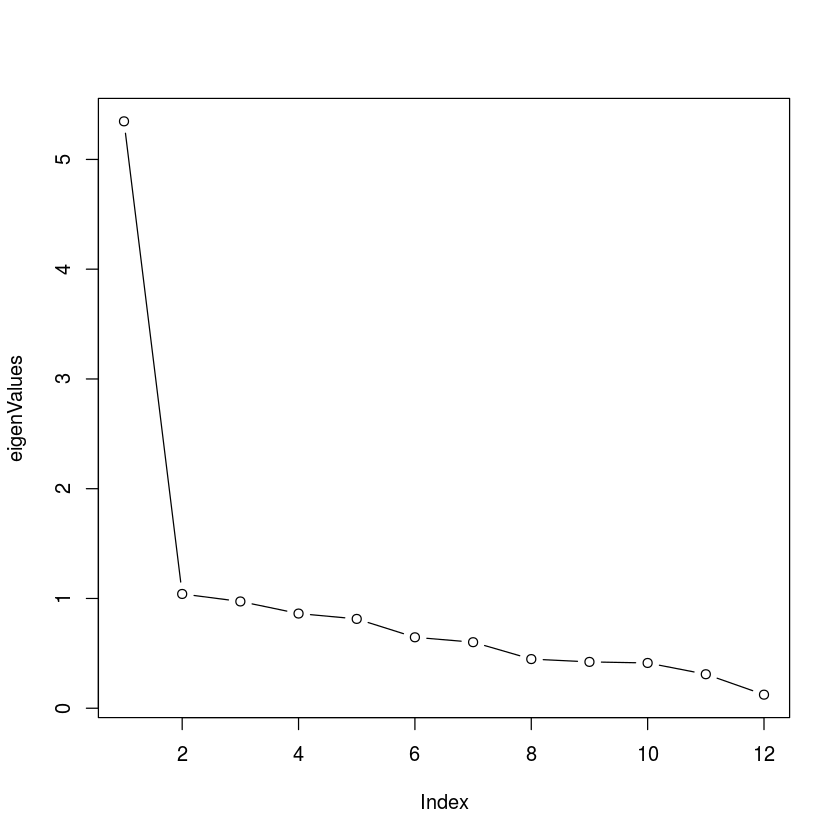

In [3]:
stockReturns.scaled = scale(stockReturns)

stockReturns.cov <- cov(stockReturns.scaled)

stockReturns.eigen <- eigen(stockReturns.cov)

eigenValues <- stockReturns.eigen$values
eigenVectors <- stockReturns.eigen$vectors

# scree plot
plot(eigenValues, type = "b")

## Create Principal Components

In [4]:
# check on correctness
#eigenVetors %*% t(eigenVetors)

# create principal component analysis
pcaOne <- as.matrix(stockReturns.scaled) %*% eigenVectors[,1]
pcaTwo <- as.matrix(stockReturns.scaled) %*% eigenVectors[,2]
pcaThree <- as.matrix(stockReturns.scaled) %*% eigenVectors[,3]

pca <- data.frame(pcaOne, pcaTwo, pcaThree)

# examine result
head(pca)
tail(pca)

,pcaOne,pcaTwo,pcaThree
121,-3.0017131,-0.1933158,-0.38658150
120,1.2911600,-0.5510177,0.31662153
119,1.6752924,-0.4436764,0.77358849
118,1.5729454,-0.9424242,0.09784403
117,-0.8051984,-1.1248464,0.90201542
116,-0.7377155,-0.8601747,-0.53989377


,pcaOne,pcaTwo,pcaThree
7,0.2160844,0.007583937,-0.4111759
6,-0.1499740,-0.248947616,-0.1778504
5,-0.1333889,0.448253174,-0.6535593
4,0.7875921,-1.504781568,-1.4636208
3,0.6493136,0.072674219,0.6505752
2,1.1604751,0.654635664,-0.7123009


# Analysis

To highlight the power of PCA, I've created two (2) comparisons, predicting the FVX (http://www.marketwatch.com/investing/index/fvx?countrycode=xx) from PCA versus using logistic regression against all stocks, the latter to show if there are any correlations.

## FVX using PCA

In [5]:
pcaFVX <- lm(stockReturns$FVX ~ pcaOne + pcaTwo + pcaThree)
summary(pcaFVX)


Call:
lm(formula = stockReturns$FVX ~ pcaOne + pcaTwo + pcaThree)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.228370 -0.070722  0.002269  0.059415  0.286974 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.018420   0.009275   1.986   0.0494 *  
pcaOne      -0.027117   0.004028  -6.732 6.72e-10 ***
pcaTwo       0.045286   0.009129   4.961 2.43e-06 ***
pcaThree     0.079448   0.009444   8.413 1.19e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1016 on 116 degrees of freedom
Multiple R-squared:  0.5481,	Adjusted R-squared:  0.5364 
F-statistic:  46.9 on 3 and 116 DF,  p-value: < 2.2e-16


## FVX using Logisitic Regression

In [6]:
pcaCompare <- lm(FVX ~ SP500 + GOOG + AAPL + ADBE + CVX + IBM + MDLZ + MSFT + NFLX + ORCL + SBUX, data=stockReturns)
summary(pcaCompare)


Call:
lm(formula = FVX ~ SP500 + GOOG + AAPL + ADBE + CVX + IBM + MDLZ + 
    MSFT + NFLX + ORCL + SBUX, data = stockReturns)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33511 -0.07983 -0.00106  0.08197  0.32382 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.023793   0.013339   1.784   0.0773 .
SP500       -0.691827   0.719053  -0.962   0.3381  
GOOG         0.312631   0.219104   1.427   0.1565  
AAPL        -0.134176   0.170626  -0.786   0.4334  
ADBE         0.273048   0.238713   1.144   0.2552  
CVX          0.330912   0.304777   1.086   0.2800  
IBM          0.450707   0.303746   1.484   0.1408  
MDLZ        -0.238541   0.282783  -0.844   0.4008  
MSFT         0.186383   0.262271   0.711   0.4788  
NFLX        -0.001722   0.077568  -0.022   0.9823  
ORCL         0.256440   0.282833   0.907   0.3666  
SBUX         0.152309   0.203625   0.748   0.4561  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual s

# Alternative Libraries: Psych for the Social Sciences

The Personality Project (http://personality-project.org/) is most popularly known for its work on the Big Five (https://en.wikipedia.org/wiki/Big_Five_personality_traits), aka OCEAN, personality inventory. As part of its work, they have developed and provide an R package, psych. The package's page is at http://personality-project.org/r/psych/, while the R documentation is at https://www.rdocumentation.org/packages/psych.

In [7]:
install.packages('psych')
library(psych)
principal(stockReturns.cov, nfactors = 3, rotate = "none")

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


Principal Components Analysis
Call: principal(r = stockReturns.cov, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
       PC1   PC2   PC3   h2   u2 com
AAPL  0.67 -0.15  0.11 0.48 0.52 1.2
ADBE  0.80  0.14 -0.03 0.67 0.33 1.1
CVX   0.64 -0.29 -0.36 0.62 0.38 2.0
GOOG  0.70 -0.15  0.21 0.56 0.44 1.3
IBM   0.68  0.08  0.03 0.48 0.52 1.0
MDLZ  0.52  0.29 -0.56 0.68 0.32 2.5
MSFT  0.73 -0.10  0.14 0.57 0.43 1.1
NFLX  0.25  0.79  0.30 0.78 0.22 1.5
ORCL  0.76 -0.16 -0.10 0.61 0.39 1.1
SBUX  0.64  0.20  0.22 0.50 0.50 1.5
FVX   0.42 -0.31  0.53 0.55 0.45 2.6
SP500 0.93  0.06 -0.16 0.89 0.11 1.1

                       PC1  PC2  PC3
SS loadings           5.35 1.04 0.97
Proportion Var        0.45 0.09 0.08
Cumulative Var        0.45 0.53 0.61
Proportion Explained  0.73 0.14 0.13
Cumulative Proportion 0.73 0.87 1.00

Mean item complexity =  1.5
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RM